# Proyecto de Ingeneria de datos - NBA

**Autores:** Diego Pincheira
             Jorge Delgado 
             Javier Burgos

**Fecha:** Junio 2022

## Motivacion 

## Exploracion de Datos dataset NBA basketball

En primera instancia es necesario realizar una exploracion de los datos 


El NBA games data esta compuesto por 5 datasets

1. Games: Información sobre cada partido y las estadísticas de los equipos que juegan.
2. Games details : Información más detallada sobre las estadísticas de cada jugador.
3. Players : Principalmente información sobre el nombre del jugador y su equipo.
4. Ranking: Información sobre la clasificación de cada equipo en cada jornada a lo largo de la temporada.
5. Teams : Información sobre los equipos.



## Diccionario
GAME_ID (ID of the game), TEAM_ID (ID of the team), TEAM_ABBREVIATION (Team's abbreviation), TEAM_CITY (City where the game was played), PLAYER_ID (ID of the player), PLAYER_NAME (Player's name), NICKNAME, START_POSITION (Position of the player) (if nothing then he's on the bench), MIN (Minutes played), FGM (Field Goals Made), FGA (Field Goals Attempted), FG_PCT (Field Goal Percentage), FG3M (Three Pointers Made), FG3A (Three Pointers Attempted), FG3_PCT (Three Point Percentage), FTM (Free Throws Made), FTA (Free Throws Attempted), FT_PCT (Free Throw Percentage), OREB (Offensive Rebounds) DREB (Defensive Rebounds), REB (Rebounds), AST (Assists), STL (Steals), BLK (Blocked shots), TO (Turnovers), PF (Personnal Foul), PTS (Number of points scored by the player), PLUS_MINUS (Plus - Minus)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


gm = pd.read_csv('https://gitlab.com/j.burgos11/ingeniera-de-datos/-/raw/main/BasketballDataset/games.csv', sep=",")[['GAME_ID','SEASON']]
dt = pd.read_csv('https://gitlab.com/j.burgos11/ingeniera-de-datos/-/raw/main/BasketballDataset/games_details.csv', sep=",")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dt.head()

GAME_ID     TEAM_ID TEAM_ABBREVIATION  TEAM_CITY  PLAYER_ID  \
0  22101005  1610612750               MIN  Minnesota    1630162   
1  22101005  1610612750               MIN  Minnesota    1630183   
2  22101005  1610612750               MIN  Minnesota    1626157   
3  22101005  1610612750               MIN  Minnesota    1627736   
4  22101005  1610612750               MIN  Minnesota    1626156   

          PLAYER_NAME      NICKNAME START_POSITION COMMENT    MIN  ...  OREB  \
0     Anthony Edwards       Anthony              F     NaN  36:22  ...   0.0   
1     Jaden McDaniels         Jaden              F     NaN  23:54  ...   2.0   
2  Karl-Anthony Towns  Karl-Anthony              C     NaN  25:17  ...   1.0   
3       Malik Beasley         Malik              G     NaN  30:52  ...   0.0   
4    D'Angelo Russell      D'Angelo              G     NaN  33:46  ...   0.0   

   DREB   REB  AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  
0   8.0   8.0  5.0  3.0  1.0  1.0  1.0  15.0         5.0  
1   4.0   6.0  0.0  0.0  2.0  2.0  6.0  14.0        10.0  
2   9.0  10.0  0.0  0.0  0.0  3.0  4.0  15.0        14.0  
3   3.0   3.0  1.0  1.0  0.0  1.0  4.0  12.0        20.0  
4   6.0   6.0  9.0  1.0  0.0  5.0  0.0  14.0        17.0  

[5 rows x 29 columns]

In [ ]:
dt.info() #tipos de variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645953 entries, 0 to 645952
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            645953 non-null  int64  
 1   TEAM_ID            645953 non-null  int64  
 2   TEAM_ABBREVIATION  645953 non-null  object 
 3   TEAM_CITY          645953 non-null  object 
 4   PLAYER_ID          645953 non-null  int64  
 5   PLAYER_NAME        645953 non-null  object 
 6   NICKNAME           30362 non-null   object 
 7   START_POSITION     247215 non-null  object 
 8   COMMENT            105602 non-null  object 
 9   MIN                540350 non-null  object 
 10  FGM                540350 non-null  float64
 11  FGA                540350 non-null  float64
 12  FG_PCT             540350 non-null  float64
 13  FG3M               540350 non-null  float64
 14  FG3A               540350 non-null  float64
 15  FG3_PCT            540350 non-null  float64
 16  FT

In [ ]:
dt.shape #dimensiones dataset

(645953, 29)

In [ ]:
dt.isna().sum().sort_values()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
PF                   105603
TO                   105603
BLK                  105603
STL                  105603
AST                  105603
REB                  105603
DREB                 105603
OREB                 105603
FT_PCT               105603
FTA                  105603
FG3A                 105603
FG3_PCT              105603
PTS                  105603
FG3M                 105603
FG_PCT               105603
FGA                  105603
FGM                  105603
MIN                  105603
FTM                  105603
PLUS_MINUS           129264
START_POSITION       398738
COMMENT              540351
NICKNAME             615591
dtype: int64

Vamos a visualizar la distribucion de los puntos de los jugadores de la NBA 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

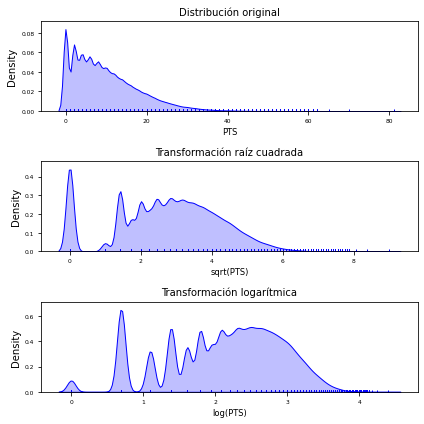

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    dt.PTS,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('PTS', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(dt.PTS),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(PTS)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(dt.PTS),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(PTS)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

Podemos visualizar un ajuste deficiente de la distribucion de los datos ( ARGUMENTAR)

 Previa a la visualizacion de la distribucion segun posicion inical es importante mencionar que dado el contexto NBA en el cual se esta realizando la EDA los jugadores por lo general van rotando dependiendo de otros factores. Tales como la instancia donde se esta jugando, contra quien juegan, etc.

Posteriormente vamos a visualizar mediante un grafico de barras como estan distribuidos las estadisticas por partido segun la posicion inicial

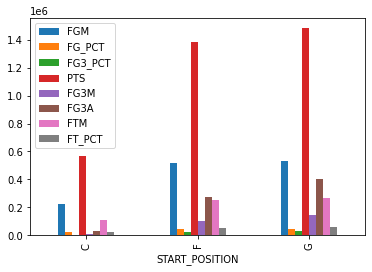

In [ ]:
pl_po = dt[['START_POSITION','FGM','FG_PCT', 'FG3_PCT', 'PTS','FG3M', 'FG3A', 'FTM', 'FT_PCT']] 
pl_po = pl_po.groupby('START_POSITION').sum().plot(kind ='bar', legend = 'Reverse')
pl_po

In [ ]:
players = dt.groupby('PLAYER_NAME').sum()
orp = players.sort_values('PTS', ascending = False)
orp.head()


GAME_ID        TEAM_ID  PLAYER_ID      FGM      FGA  \
PLAYER_NAME                                                                
LeBron James     41609688931  2829846588315    4469808  16612.0  33053.0   
Carmelo Anthony  32674897854  2425582799312    3834276  11231.0  25283.0   
Kevin Durant     27158583707  1876363860071  234330430  10486.0  21302.0   
Dwyane Wade      31639598577  2201707625502    3483116  10256.0  21466.0   
Dirk Nowitzki    30371473938  2221034971218    2367743   9908.0  21014.0   

                  FG_PCT    FG3M    FG3A  FG3_PCT     FTM  ...    OREB  \
PLAYER_NAME                                                ...           
LeBron James     857.181  2599.0  7552.0  513.676  9860.0  ...  2035.0   
Carmelo Anthony  623.445  1910.0  5393.0  429.519  7154.0  ...  2215.0   
Kevin Durant     569.506  2168.0  5692.0  434.980  7566.0  ...   806.0   
Dwyane Wade      615.639   688.0  2289.0  223.833  6902.0  ...  1537.0   
Dirk Nowitzki    625.729  1552.0  4100.0  441.192  6559.0  ...  1219.0   

                    DREB      REB      AST     STL     BLK      TO      PF  \
PLAYER_NAME                                                                  
LeBron James     10831.0  12866.0  12263.0  2693.0  1322.0  5930.0  3214.0   
Carmelo Anthony   6513.0   8728.0   3802.0  1403.0   705.0  3460.0  4026.0   
Kevin Durant      7237.0   8043.0   4708.0  1238.0  1254.0  3525.0  2263.0   
Dwyane Wade       4544.0   6081.0   6809.0  1993.0  1093.0  4088.0  2930.0   
Dirk Nowitzki     8715.0   9934.0   3213.0   997.0  1068.0  2175.0  2997.0   

                     PTS  PLUS_MINUS  
PLAYER_NAME                           
LeBron James     45683.0      8512.0  
Carmelo Anthony  31526.0      1160.0  
Kevin Durant     30706.0      5095.0  
Dwyane Wade      28102.0      3186.0  
Dirk Nowitzki    27927.0      4833.0  

[5 rows x 22 columns]

(array([2.162e+03, 2.360e+02, 8.400e+01, 4.300e+01, 1.300e+01, 5.000e+00,
        5.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  4568.3,  9136.6, 13704.9, 18273.2, 22841.5, 27409.8,
        31978.1, 36546.4, 41114.7, 45683. ]),
 <a list of 10 Patch objects>)

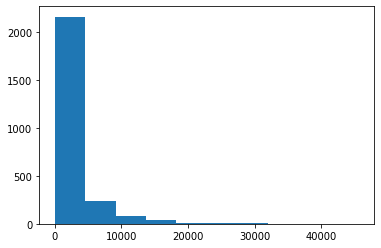

In [ ]:
plt.hist(orp.PTS)



A continuacion vamos a visualizar la distribuicion de los puntos por jugador segun la posicion inicial.

Text(0.5, 1.0, 'Total de puntos realizados por posicion')

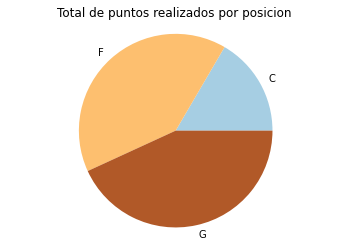

In [ ]:
dt.PTS.groupby(dt.START_POSITION).sum().plot(kind='pie',cmap='Paired') #total de puntos por posicion
plt.axis('equal')
plt.ylabel('')
plt.title('Total de puntos realizados por posicion')


Text(0.5, 1.0, 'promedio de puntos realizados por posicion')

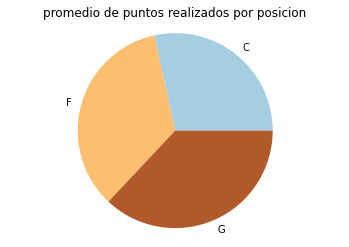

In [ ]:
dt.PTS.groupby(dt.START_POSITION).mean().plot(kind='pie',cmap='Paired') #promedio de puntos por posicion
plt.axis('equal')
plt.ylabel('')
plt.title('promedio de puntos realizados por posicion')

En la etapa inicial de preprocesamiento de los datos. Normalizar los datos tiene como objetivo facilitar el analis estadistico que podemos hacer posteriormente. Al tener consistencia entre las variables del dataset nos permite realizar una comparacion mas acertada entre las diferentes caracteristicas que posee el dataset games_details. Ademas, nos aseguramos que las variables tengan el mismo impacto en el modelo posterior a la realizacion de la EDA. De esta manera ayudar a ahorrar recursos computacionales.

In [ ]:
#En el dataset games es necesario realizar un preprocesamiento de los datos y verificar que no presenta datos duplicados segun la id del partido
gm = gm.loc[~gm[['GAME_ID']].duplicated()] 
gm.head()

GAME_ID  SEASON
0  22101005    2021
1  22101006    2021
2  22101007    2021
3  22101008    2021
4  22101009    2021

Crearemos un nuevo dataset con las variables que ultilizariamos para el desarrollo del analisis respectivo. A continuacion se visualiza que no existen rangos consistenten entre el min y el max de cada variable lo cual puede deberse a presencia de outliers. Es por esto que es necesario realizar la normalizacion de cada variable.

In [ ]:
dt.drop(['GAME_ID','TEAM_ID','PLAYER_ID'],axis=1).describe().transpose()

count      mean        std   min    25%    50%     75%   max
FGM         540350.0  3.582408   3.023962   0.0  1.000  3.000   5.000  28.0
FGA         540350.0  7.891298   5.665752   0.0  3.000  7.000  11.000  50.0
FG_PCT      540350.0  0.416203   0.251634   0.0  0.263  0.429   0.571   1.0
FG3M        540350.0  0.765731   1.216917   0.0  0.000  0.000   1.000  14.0
FG3A        540350.0  2.151618   2.547737   0.0  0.000  1.000   4.000  24.0
FG3_PCT     540350.0  0.199166   0.289447   0.0  0.000  0.000   0.375   1.0
FTM         540350.0  1.734931   2.353475   0.0  0.000  1.000   3.000  26.0
FTA         540350.0  2.288537   2.887957   0.0  0.000  2.000   4.000  39.0
FT_PCT      540350.0  0.436100   0.427947   0.0  0.000  0.500   0.909   1.0
OREB        540350.0  1.026770   1.400243   0.0  0.000  1.000   2.000  18.0
DREB        540350.0  3.032875   2.687996   0.0  1.000  2.000   4.000  25.0
REB         540350.0  4.059645   3.486507   0.0  1.000  3.000   6.000  31.0
AST         540350.0  2.097692   2.473238   0.0  0.000  1.000   3.000  25.0
STL         540350.0  0.722541   0.973573   0.0  0.000  0.000   1.000  10.0
BLK         540350.0  0.461377   0.863525   0.0  0.000  0.000   1.000  12.0
TO          540350.0  1.321897   1.402182   0.0  0.000  1.000   2.000  12.0
PF          540350.0  2.003018   1.503081   0.0  1.000  2.000   3.000  15.0
PTS         540350.0  9.665469   8.056629   0.0  3.000  8.000  14.000  81.0
PLUS_MINUS  516689.0 -0.000505  10.640185 -57.0 -7.000  0.000   6.000  57.0

In [ ]:
dt.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS'],
      dtype='object')

In [ ]:
dt_clean = dt.drop(['TEAM_ABBREVIATION','NICKNAME','COMMENT','PLUS_MINUS'],axis=1)
dt_clean

GAME_ID     TEAM_ID  TEAM_CITY  PLAYER_ID         PLAYER_NAME  \
0       22101005  1610612750  Minnesota    1630162     Anthony Edwards   
1       22101005  1610612750  Minnesota    1630183     Jaden McDaniels   
2       22101005  1610612750  Minnesota    1626157  Karl-Anthony Towns   
3       22101005  1610612750  Minnesota    1627736       Malik Beasley   
4       22101005  1610612750  Minnesota    1626156    D'Angelo Russell   
...          ...         ...        ...        ...                 ...   
645948  11200005  1610612743     Denver     202706     Jordan Hamilton   
645949  11200005  1610612743     Denver     202702      Kenneth Faried   
645950  11200005  1610612743     Denver     201585        Kosta Koufos   
645951  11200005  1610612743     Denver     202389      Timofey Mozgov   
645952  11200005  1610612743     Denver     201951           Ty Lawson   

       START_POSITION    MIN  FGM   FGA  FG_PCT  ...  FT_PCT  OREB  DREB  \
0                   F  36:22  4.0  10.0   0.400  ...   1.000   0.0   8.0   
1                   F  23:54  6.0   8.0   0.750  ...   1.000   2.0   4.0   
2                   C  25:17  4.0   9.0   0.444  ...   0.750   1.0   9.0   
3                   G  30:52  4.0   9.0   0.444  ...   0.000   0.0   3.0   
4                   G  33:46  3.0  13.0   0.231  ...   1.000   0.0   6.0   
...               ...    ...  ...   ...     ...  ...     ...   ...   ...   
645948            NaN     19  4.0   9.0   0.444  ...   0.857   0.0   2.0   
645949            NaN     23  7.0  11.0   0.636  ...   1.000   1.0   0.0   
645950            NaN     15  3.0   7.0   0.429  ...   0.000   3.0   5.0   
645951            NaN     19  1.0   1.0   1.000  ...   0.000   1.0   2.0   
645952            NaN     27  3.0   6.0   0.500  ...   0.500   0.0   2.0   

         REB  AST  STL  BLK   TO   PF   PTS  
0        8.0  5.0  3.0  1.0  1.0  1.0  15.0  
1        6.0  0.0  0.0  2.0  2.0  6.0  14.0  
2       10.0  0.0  0.0  0.0  3.0  4.0  15.0  
3        3.0  1.0  1.0  0.0  1.0  4.0  12.0  
4        6.0  9.0  1.0  0.0  5.0  0.0  14.0  
...      ...  ...  ...  ...  ...  ...   ...  
645948   2.0  0.0  2.0  0.0  1.0  3.0  17.0  
645949   1.0  1.0  1.0  0.0  3.0  3.0  18.0  
645950   8.0  0.0  1.0  0.0  0.0  3.0   6.0  
645951   3.0  1.0  0.0  0.0  4.0  2.0   2.0  
645952   2.0  6.0  2.0  0.0  6.0  1.0   8.0  

[645953 rows x 25 columns]

In [ ]:
dt_clean[dt_clean.duplicated(subset=['GAME_ID','PLAYER_ID'], keep="first")]

GAME_ID     TEAM_ID    TEAM_CITY  PLAYER_ID               PLAYER_NAME  \
43304  22000069  1610612763      Memphis    1628960             Grayson Allen   
43305  22000069  1610612763      Memphis    1629007             Jontay Porter   
43306  22000069  1610612763      Memphis    1630214            Xavier Tillman   
43307  22000069  1610612766    Charlotte    1630176          Vernon Carey Jr.   
43308  22000069  1610612766    Charlotte    1628370                Malik Monk   
...         ...         ...          ...        ...                       ...   
60154  22000002  1610612746           LA    1628379              Luke Kennard   
60155  22000002  1610612747  Los Angeles     203484  Kentavious Caldwell-Pope   
60156  22000002  1610612747  Los Angeles     203471           Dennis Schroder   
60157  22000002  1610612747  Los Angeles    1628398                Kyle Kuzma   
60158  22000002  1610612747  Los Angeles     202693           Markieff Morris   

      START_POSITION    MIN  FGM   FGA  FG_PCT  ...  FT_PCT  OREB  DREB   REB  \
43304            NaN    NaN  NaN   NaN     NaN  ...     NaN   NaN   NaN   NaN   
43305            NaN    NaN  NaN   NaN     NaN  ...     NaN   NaN   NaN   NaN   
43306            NaN    NaN  NaN   NaN     NaN  ...     NaN   NaN   NaN   NaN   
43307            NaN    NaN  NaN   NaN     NaN  ...     NaN   NaN   NaN   NaN   
43308            NaN    NaN  NaN   NaN     NaN  ...     NaN   NaN   NaN   NaN   
...              ...    ...  ...   ...     ...  ...     ...   ...   ...   ...   
60154            NaN  21:03  2.0   6.0   0.333  ...   0.000   0.0   2.0   2.0   
60155              G  23:03  2.0   4.0   0.500  ...   1.000   0.0   2.0   2.0   
60156              G  27:48  5.0  15.0   0.333  ...   0.500   1.0  11.0  12.0   
60157            NaN  26:38  6.0  11.0   0.545  ...   1.000   0.0   1.0   1.0   
60158            NaN  19:00  1.0   3.0   0.333  ...   0.667   1.0   3.0   4.0   

       AST  STL  BLK   TO   PF   PTS  
43304  NaN  NaN  NaN  NaN  NaN   NaN  
43305  NaN  NaN  NaN  NaN  NaN   NaN  
43306  NaN  NaN  NaN  NaN  NaN   NaN  
43307  NaN  NaN  NaN  NaN  NaN   NaN  
43308  NaN  NaN  NaN  NaN  NaN   NaN  
...    ...  ...  ...  ...  ...   ...  
60154  2.0  2.0  1.0  1.0  3.0   4.0  
60155  1.0  2.0  1.0  2.0  2.0   9.0  
60156  8.0  0.0  0.0  1.0  4.0  14.0  
60157  0.0  0.0  0.0  2.0  2.0  15.0  
60158  1.0  0.0  0.0  0.0  0.0   5.0  

[289 rows x 25 columns]

In [ ]:
dt_clean.drop_duplicates(subset=['GAME_ID','PLAYER_ID'],keep="first",inplace=True)


In [ ]:
dt_clean = dt_clean.groupby(['GAME_ID','TEAM_ID','PLAYER_NAME']).sum()
dt_clean = dt_clean.reset_index()
dt_clean['FG_PCT'] =dt_clean['FGM']/dt['FGA']*100
dt_clean['FG3_PCT'] = dt_clean['FG3M']/dt['FG3A']*100
dt_clean['FT_PCT'] = dt_clean['FTM']/dt_clean['FTA']*100

In [ ]:
print (f'Tiene {dt_clean.isna().sum().sum()} valores nulos.\n')

print(dt_clean['GAME_ID'].value_counts().sort_values().tail(5))
display(dt_clean[dt_clean['GAME_ID'] == 10500109])

#elimina valores nulos

dt_clean = dt_clean.drop(index=335,axis=0)
dt_clean = dt_clean.reset_index().drop('index',axis=1)

Tiene 688783 valores nulos.

12100034    40
11800019    40
11800021    40
12100048    40
11900059    40
Name: GAME_ID, dtype: int64


GAME_ID     TEAM_ID       PLAYER_NAME  PLAYER_ID  FGM   FGA  \
4201  10500109  1610612742     DeSagana Diop       2205  2.0   4.0   
4202  10500109  1610612742      Devin Harris       2734  1.0   3.0   
4203  10500109  1610612742     Dirk Nowitzki       1717  5.0  13.0   
4204  10500109  1610612742     Doug Christie         57  2.0   5.0   
4205  10500109  1610612742     Erick Dampier        956  3.0   4.0   
4206  10500109  1610612742       Jason Terry       1891  5.0  12.0   
4207  10500109  1610612742       Josh Howard       2572  6.0  11.0   
4208  10500109  1610612742    Keith Van Horn       1496  6.0  13.0   
4209  10500109  1610612742   Marquis Daniels       2605  6.0   8.0   
4210  10500109  1610612756        Boris Diaw       2564  0.0   0.0   
4211  10500109  1610612765        Alex Acker     101165  0.0   2.0   
4212  10500109  1610612765   Antonio McDyess        686  3.0  10.0   
4213  10500109  1610612765       Ben Wallace       1112  3.0   8.0   
4214  10500109  1610612765     Carlos Arroyo       2306  4.0   5.0   
4215  10500109  1610612765    Carlos Delfino       2568  1.0   5.0   
4216  10500109  1610612765  Chauncey Billups       1497  3.0   9.0   
4217  10500109  1610612765     Darko Milicic       2545  3.0   7.0   
4218  10500109  1610612765     Jason Maxiell     101131  5.0   8.0   
4219  10500109  1610612765     Maurice Evans       2230  2.0   5.0   
4220  10500109  1610612765   Rasheed Wallace        739  2.0   4.0   
4221  10500109  1610612765  Richard Hamilton       1888  8.0  11.0   
4222  10500109  1610612765     Ronald Dupree       2648  3.0   3.0   
4223  10500109  1610612765   Tayshaun Prince       2419  3.0  10.0   

          FG_PCT  FG3M  FG3A    FG3_PCT  ...      FT_PCT  OREB  DREB  REB  \
4201   22.222222   0.0   0.0   0.000000  ...  100.000000   4.0   4.0  8.0   
4202    4.166667   0.0   0.0   0.000000  ...  100.000000   0.0   1.0  1.0   
4203   20.000000   0.0   1.0   0.000000  ...   85.714286   2.0   4.0  6.0   
4204   15.384615   0.0   1.0   0.000000  ...         NaN   0.0   2.0  2.0   
4205   37.500000   0.0   0.0   0.000000  ...    0.000000   1.0   5.0  6.0   
4206  125.000000   2.0   6.0  66.666667  ...   50.000000   0.0   3.0  3.0   
4207  120.000000   0.0   2.0   0.000000  ...   66.666667   1.0   3.0  4.0   
4208         inf   3.0   6.0        inf  ...  100.000000   1.0   1.0  2.0   
4209  600.000000   0.0   0.0   0.000000  ...   66.666667   1.0   4.0  5.0   
4210         NaN   0.0   0.0        NaN  ...         NaN   0.0   0.0  0.0   
4211         NaN   0.0   1.0        NaN  ...  100.000000   0.0   0.0  0.0   
4212  150.000000   0.0   0.0   0.000000  ...         NaN   2.0   6.0  8.0   
4213   16.666667   0.0   0.0   0.000000  ...    0.000000   2.0   6.0  8.0   
4214   50.000000   0.0   0.0        NaN  ...         NaN   0.0   0.0  0.0   
4215    6.666667   1.0   1.0  50.000000  ...         NaN   0.0   2.0  2.0   
4216   14.285714   1.0   2.0  20.000000  ...  100.000000   1.0   1.0  2.0   
4217   75.000000   0.0   0.0   0.000000  ...  100.000000   0.0   3.0  3.0   
4218   55.555556   0.0   0.0   0.000000  ...         NaN   4.0   0.0  4.0   
4219  200.000000   1.0   2.0        inf  ...         NaN   0.0   1.0  1.0   
4220   50.000000   0.0   0.0   0.000000  ...         NaN   1.0   1.0  2.0   
4221         NaN   0.0   0.0        NaN  ...  100.000000   1.0   1.0  2.0   
4222         NaN   0.0   0.0        NaN  ...         NaN   2.0   3.0  5.0   
4223   25.000000   1.0   3.0  10.000000  ...  100.000000   2.0   2.0  4.0   

      AST  STL  BLK   TO   PF   PTS  
4201  0.0  0.0  4.0  0.0  2.0   6.0  
4202  3.0  0.0  0.0  0.0  2.0   4.0  
4203  2.0  2.0  1.0  3.0  1.0  16.0  
4204  5.0  2.0  0.0  2.0  3.0   4.0  
4205  0.0  0.0  0.0  2.0  3.0   6.0  
4206  6.0  2.0  2.0  3.0  2.0  15.0  
4207  0.0  2.0  2.0  1.0  3.0  14.0  
4208  0.0  0.0  0.0  0.0  2.0  22.0  
4209  2.0  0.0  0.0  2.0  1.0  16.0  
4210  0.0  0.0  0.0  0.0  0.0   0.0  
4211  1.0  1.0  0.0  0.0  2.0   2.0  
4212  1.0  1.0  2.0  

In [ ]:
dt_clean = dt_clean.sort_values('GAME_ID')   #Ordenar las filas por GAME_ID, es una comprobación extra para evitar cualquier error en las siguientes filas del código
dt_clean['VICTORY'] = ''

for i in range(0,len(dt)-1,2):
    if dt_clean['PTS'][i] > dt_clean['PTS'][i+1]:   # Comprueba cuál de los dos equipos ha ganado y actualiza la columna "VICTORY"
        
        dt_clean.loc[i , 'VICTORY'] = 'Yes'
        dt_clean.loc[i+1 , 'VICTORY'] = 'No'
        
    elif dt_clean['PTS'][i] < dt_clean['PTS'][i+1]:
        
        dt_clean.loc[i , 'VICTORY'] = 'No'
        dt_clean.loc[i+1 , 'VICTORY'] = 'Yes'
        
    else:                               # Comprobación de posibles filas problemáticas debido al "ruido"
        print('Juego Empatado')
        print(dt_clean.iloc[i])

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Juego Empatado
GAME_ID             21701133
TEAM_ID           1610612743
PLAYER_NAME    Malik Beasley
PLAYER_ID            1627736
FGM                      0.0
FGA                      0.0
FG_PCT                   0.0
FG3M                     0.0
FG3A                     0.0
FG3_PCT                  0.0
FTM                      0.0
FTA                      0.0
FT_PCT                   NaN
OREB                     0.0
DREB                     0.0
REB                      0.0
AST                      0.0
STL                      0.0
BLK                      0.0
TO                       0.0
PF                       0.0
PTS                      0.0
VICTORY                   No
Name: 492956, dtype: object
Juego Empatado
GAME_ID            21701134
TEAM_ID          1610612750
PLAYER_NAME    Aaron Brooks
PLAYER_ID            201166
FGM                     0.0
FGA                     0.0
FG_PCT                  NaN
FG3M        

In [ ]:
dt_clean.head()

GAME_ID     TEAM_ID     PLAYER_NAME  PLAYER_ID  FGM   FGA     FG_PCT  \
0   10300001  1610612742  Antawn Jamison       1712  8.0  13.0  80.000000   
29  10300001  1610612762  Sasha Pavlovic       2562  4.0   5.0  16.666667   
28  10300001  1610612762      Raul Lopez       2221  2.0   7.0  40.000000   
27  10300001  1610612762       Raja Bell       1952  1.0   5.0   5.882353   
26  10300001  1610612762      Paul Grant       1514  2.0   3.0  22.222222   

    FG3M  FG3A  FG3_PCT  ...  OREB  DREB  REB  AST  STL  BLK   TO   PF   PTS  \
0    0.0   1.0      0.0  ...   2.0   1.0  3.0  2.0  2.0  0.0  2.0  3.0  16.0   
29   0.0   0.0      0.0  ...   0.0   2.0  2.0  2.0  0.0  1.0  2.0  4.0  10.0   
28   0.0   0.0      0.0  ...   0.0   1.0  1.0  4.0  0.0  0.0  2.0  0.0  10.0   
27   0.0   0.0      0.0  ...   1.0   1.0  2.0  1.0  1.0  0.0  0.0  0.0   2.0   
26   0.0   0.0      0.0  ...   0.0   1.0  1.0  1.0  0.0  0.0  0.0  0.0   6.0   

    VICTORY  
0       Yes  
29           
28           
27       No  
26      Yes  

[5 rows x 23 columns]

In [ ]:
dt_clean.columns

Index(['GAME_ID', 'TEAM_ID', 'PLAYER_NAME', 'PLAYER_ID', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'VICTORY'],
      dtype='object')

In [ ]:
dt_clean = pd.merge(dt_clean,gm,how='left',on='GAME_ID')

In [ ]:
dtNBA = dt_clean.drop(['GAME_DATE_EST_x', 'SEASON_y',	'GAME_DATE_EST_y','SEASON_x',	'SEASON_y',	'SEASON_x',	'SEASON_y',	'SEASON_x',	'SEASON_y'],axis=1)
dtNBA.head()

GAME_ID     TEAM_ID     PLAYER_NAME  PLAYER_ID  FGM   FGA     FG_PCT  \
0  10300001  1610612742  Antawn Jamison       1712  8.0  13.0  80.000000   
1  10300001  1610612762  Sasha Pavlovic       2562  4.0   5.0  16.666667   
2  10300001  1610612762      Raul Lopez       2221  2.0   7.0  40.000000   
3  10300001  1610612762       Raja Bell       1952  1.0   5.0   5.882353   
4  10300001  1610612762      Paul Grant       1514  2.0   3.0  22.222222   

   FG3M  FG3A  FG3_PCT  ...  DREB  REB  AST  STL  BLK   TO   PF   PTS  \
0   0.0   1.0      0.0  ...   1.0  3.0  2.0  2.0  0.0  2.0  3.0  16.0   
1   0.0   0.0      0.0  ...   2.0  2.0  2.0  0.0  1.0  2.0  4.0  10.0   
2   0.0   0.0      0.0  ...   1.0  1.0  4.0  0.0  0.0  2.0  0.0  10.0   
3   0.0   0.0      0.0  ...   1.0  2.0  1.0  1.0  0.0  0.0  0.0   2.0   
4   0.0   0.0      0.0  ...   1.0  1.0  1.0  0.0  0.0  0.0  0.0   6.0   

   VICTORY  SEASON  
0      Yes    2003  
1             2003  
2             2003  
3       No    2003  
4      Yes    2003  

[5 rows x 24 columns]

In [ ]:
dtNBA.columns

Index(['GAME_ID', 'TEAM_ID', 'PLAYER_NAME', 'PLAYER_ID', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'VICTORY',
       'SEASON'],
      dtype='object')

##Eficiencia
La NBA publica en Internet todas las estadísticas básicas registradas oficialmente por la liga. La eficiencia individual de los jugadores se expresa allí mediante una estadística denominada "eficiencia" y abreviada EFF. Se obtiene mediante una sencilla fórmula:

Índice de eficiencia de la NBA:
(PTS + REB + AST + STL + BLK - ((FGA - FGM) + (FTA - FTM) + TO))


In [ ]:
average_eff = (
    dtNBA['PTS'].mean() + 
    dtNBA['REB'].mean() + 
    dtNBA['AST'].mean() + 
    dtNBA['STL'].mean() + 
    dtNBA['BLK'].mean() - (
    dtNBA['FGA'].mean() -
    dtNBA['FGM'].mean()
    ) + (
        dtNBA['FTA'].mean() -
        dtNBA['FTM'].mean()
    ) +
    dtNBA['TO'].mean()
)
average_eff

12.187324397770714

In [ ]:
dtNBA['EFF'] = (
    dtNBA['PTS'] + 
    dtNBA['REB'] + 
    dtNBA['AST'] + 
    dtNBA['STL'] + 
    dtNBA['BLK'] - (
    dtNBA['FGA'] -
    dtNBA['FGM']
    ) + (
        dtNBA['FTA'] -
        dtNBA['FTM']
    ) +
    dtNBA['TO']
)
dtNBA.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


GAME_ID     TEAM_ID     PLAYER_NAME  PLAYER_ID  FGM   FGA     FG_PCT  \
0  10300001  1610612742  Antawn Jamison       1712  8.0  13.0  80.000000   
1  10300001  1610612762  Sasha Pavlovic       2562  4.0   5.0  16.666667   
2  10300001  1610612762      Raul Lopez       2221  2.0   7.0  40.000000   
3  10300001  1610612762       Raja Bell       1952  1.0   5.0   5.882353   
4  10300001  1610612762      Paul Grant       1514  2.0   3.0  22.222222   

   FG3M  FG3A  FG3_PCT  ...  REB  AST  STL  BLK   TO   PF   PTS  VICTORY  \
0   0.0   1.0      0.0  ...  3.0  2.0  2.0  0.0  2.0  3.0  16.0      Yes   
1   0.0   0.0      0.0  ...  2.0  2.0  0.0  1.0  2.0  4.0  10.0            
2   0.0   0.0      0.0  ...  1.0  4.0  0.0  0.0  2.0  0.0  10.0            
3   0.0   0.0      0.0  ...  2.0  1.0  1.0  0.0  0.0  0.0   2.0       No   
4   0.0   0.0      0.0  ...  1.0  1.0  0.0  0.0  0.0  0.0   6.0      Yes   

   SEASON   EFF  
0    2003  26.0  
1    2003  16.0  
2    2003  14.0  
3    2003   2.0  
4    2003   7.0  

[5 rows x 25 columns]

In [ ]:
selected = [
    'PLAYER_NAME','PTS', 'REB', 'AST', 'STL', 'BLK',
    'FGA', 'FGM', 'FTA', 'FTM', 'TO', 'EFF'
]

dtNBA[selected].sort_values(
    by = "EFF",
    ascending = False
).head(10)

PLAYER_NAME    PTS   REB   AST  STL  BLK   FGA   FGM   FTA   FTM  \
7607     Ryan Hollins  103.0   5.0   0.0  1.0  1.0   7.0   5.0   2.0   0.0   
6990    Mouhamed Sene   90.0   6.0   0.0  1.0  3.0   7.0   3.0   0.0   0.0   
285910  Dwight Howard   45.0  23.0   3.0  4.0  2.0  21.0  12.0  39.0  21.0   
445872   James Harden   53.0  16.0  17.0  0.0  0.0  26.0  14.0  18.0  16.0   
483312   James Harden   60.0  10.0  11.0  4.0  1.0  30.0  19.0  18.0  17.0   
650225   Kevin Durant   49.0  17.0  10.0  3.0  2.0  23.0  16.0  16.0  13.0   
119118    Kobe Bryant   81.0   6.0   2.0  3.0  1.0  46.0  28.0  20.0  18.0   
174112    Dwyane Wade   48.0   7.0  11.0  3.0  3.0  21.0  16.0  23.0  16.0   
422530  Anthony Davis   59.0  20.0   4.0  0.0  1.0  34.0  24.0  10.0   9.0   
216030    Dwyane Wade   48.0   6.0  12.0  4.0  3.0  21.0  15.0  18.0  13.0   

         TO    EFF  
7607    0.0  110.0  
6990    0.0   96.0  
285910  3.0   89.0  
445872  8.0   84.0  
483312  5.0   81.0  
650225  3.0   80.0  
119118  3.0   80.0  
174112  5.0   79.0  
422530  2.0   77.0  
216030  5.0   77.0

##Correlacion entre las variables

In [ ]:
corr_matrix = dtNBA[selected].corr(method='pearson')
corr_matrix

PTS       REB       AST       STL       BLK       FGA       FGM  \
PTS  1.000000  0.543609  0.508338  0.390254  0.234507  0.905226  0.967701   
REB  0.543609  1.000000  0.281569  0.269389  0.413606  0.564561  0.553903   
AST  0.508338  0.281569  1.000000  0.361730  0.066466  0.548334  0.483508   
STL  0.390254  0.269389  0.361730  1.000000  0.115608  0.414407  0.377187   
BLK  0.234507  0.413606  0.066466  0.115608  1.000000  0.228797  0.246540   
FGA  0.905226  0.564561  0.548334  0.414407  0.228797  1.000000  0.907176   
FGM  0.967701  0.553903  0.483508  0.377187  0.246540  0.907176  1.000000   
FTA  0.694085  0.452985  0.367490  0.289637  0.217333  0.569454  0.542309   
FTM  0.700814  0.404691  0.374552  0.281226  0.181458  0.564715  0.530125   
TO   0.505365  0.390975  0.459483  0.308545  0.168238  0.527462  0.485398   
EFF  0.912152  0.734697  0.605103  0.462090  0.371197  0.795074  0.888907   

          FTA       FTM        TO       EFF  
PTS  0.694085  0.700814  0.505365  0.912152  
REB  0.452985  0.404691  0.390975  0.734697  
AST  0.367490  0.374552  0.459483  0.605103  
STL  0.289637  0.281226  0.308545  0.462090  
BLK  0.217333  0.181458  0.168238  0.371197  
FGA  0.569454  0.564715  0.527462  0.795074  
FGM  0.542309  0.530125  0.485398  0.888907  
FTA  1.000000  0.954574  0.408401  0.700980  
FTM  0.954574  1.000000  0.397167  0.667332  
TO   0.408401  0.397167  1.000000  0.608248  
EFF  0.700980  0.667332  0.608248  1.000000

In [ ]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
   

In [194]:
 tidy_corr_matrix(corr_matrix).head(10) 

variable_1 variable_2         r     abs_r
66         FGM        PTS  0.967701  0.967701
6          PTS        FGM  0.967701  0.967701
85         FTA        FTM  0.954574  0.954574
95         FTM        FTA  0.954574  0.954574
110        EFF        PTS  0.912152  0.912152
10         PTS        EFF  0.912152  0.912152
71         FGM        FGA  0.907176  0.907176
61         FGA        FGM  0.907176  0.907176
55         FGA        PTS  0.905226  0.905226
5          PTS        FGA  0.905226  0.905226

#Grafico de correlacion

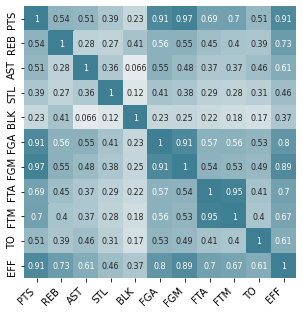

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

##Tiros de 3 puntos

In [ ]:
seasonal_stats = dtNBA.groupby('SEASON').sum()/dtNBA.groupby('SEASON').count()

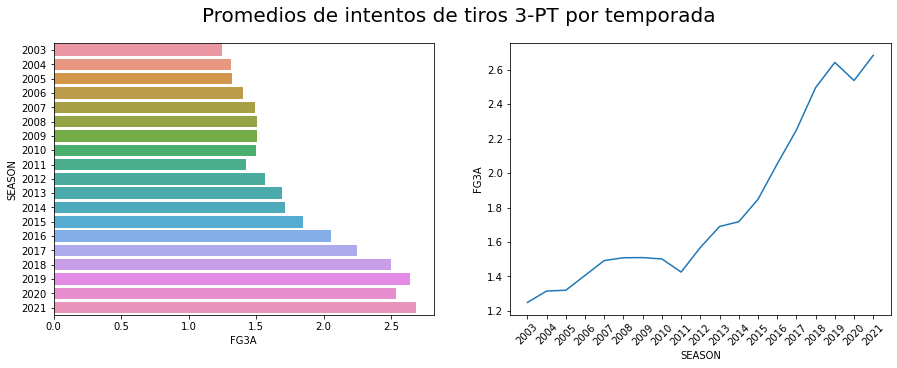

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Promedios de intentos de tiros 3-PT por temporada', fontsize=20)
sns.barplot(x=seasonal_stats["FG3A"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["FG3A"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

##Clustering

## PCA
Debido al que el conjunto de datos contiene muchas variables o atributos que pueden ser ultilizados para el analisis. Algunas combinaciones de variables pueden ser mas significativas que otras o nos pueden ofrecer informacion mas valiosa para la posterior creacion del modelo. Es decir, para mantener focalizado se puede hacer uso de PCA para reducir las estadisticas individuales de los jugadores en 2 componentes. Jugadores Ofensivos y jugadores defensivos con el objetivo de interpretar los datos de la forma mas significativa.

In [ ]:
agg_dtNBA = dtNBA.groupby(['PLAYER_ID', 'PLAYER_NAME'])[['FGA', 'FGM', 'FG3A', 'FG3M', 'FTA', 'FTM', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TO', 'PF']].sum().reset_index()
agg_dtNBA.head()

PLAYER_ID      PLAYER_NAME     FGA     FGM   FG3A   FG3M    FTA    FTM  \
0         15  Eric Piatkowski   638.0   256.0  377.0  145.0  100.0   81.0   
1         42   Monty Williams     4.0     1.0    0.0    0.0    0.0    0.0   
2         43    Chris Whitney    45.0    19.0   19.0    9.0    6.0    5.0   
3         56      Gary Payton  3108.0  1369.0  800.0  233.0  723.0  534.0   
4         57    Doug Christie  1247.0   535.0  247.0   78.0  317.0  272.0   

    OREB   DREB     AST    STL   BLK     TO     PF     PTS  
0   39.0  187.0   115.0   61.0  13.0   97.0  165.0   738.0  
1    1.0    3.0     0.0    1.0   0.0    2.0    0.0     2.0  
2    3.0   10.0    14.0    6.0   2.0    6.0    8.0    52.0  
3  212.0  902.0  1611.0  362.0  54.0  544.0  726.0  3505.0  
4  133.0  490.0   637.0  276.0  68.0  301.0  363.0  1420.0

In [ ]:
st_agg_dtNBA = StandardScaler().fit_transform(agg_dtNBA.drop(columns = ['PLAYER_ID', 'PLAYER_NAME'])) #Estandarizando las variables

In [ ]:
dt_pca_NBA = PCA(n_components=2)

In [ ]:
x_pca = dt_pca_NBA.fit_transform(st_agg_dtNBA)

In [ ]:
st_agg_dtNBA.shape

(2580, 14)

In [ ]:
x_pca.shape

(2580, 2)

In [ ]:
st_agg_dtNBA

array([[-0.32904354, -0.34624385, -0.08068994, ..., -0.34467915,
        -0.38754583, -0.32982332],
       [-0.53200637, -0.52274201, -0.46682121, ..., -0.52452822,
        -0.63581712, -0.51617292],
       [-0.51888101, -0.51028332, -0.44736101, ..., -0.51695562,
        -0.62377972, -0.5035133 ],
       ...,
       [-0.53328689, -0.52343416, -0.46682121, ..., -0.52831451,
        -0.63581712, -0.5166793 ],
       [-0.5323265 , -0.52343416, -0.46682121, ..., -0.52831451,
        -0.63581712, -0.51591972],
       [-0.53200637, -0.52274201, -0.46579698, ..., -0.52831451,
        -0.63581712, -0.51516015]])

In [ ]:
x_pca

array([[-1.17937597, -0.32589625],
       [-1.8664389 , -0.0538795 ],
       [-1.82306146, -0.0700593 ],
       ...,
       [-1.87043846, -0.0550122 ],
       [-1.86682635, -0.05387148],
       [-1.86393404, -0.05625607]])

In [ ]:
model_dt_NBA = pd.DataFrame(dt_pca_NBA .components_, 
             index = ['OFENSIVE', 'DEFENSIVE'],
             columns = agg_dtNBA.drop(columns = ['PLAYER_ID', 'PLAYER_NAME']).columns).round(2)
styles = [dict(selector="caption", props=[("caption-side", "bottom")])]
model_dt_NBA.style.set_table_styles(styles).set_properties(**{'font-size':'14pt'}).background_gradient('Blues').set_precision(2).set_caption('Diferenciacion de jugadores de la temporada 2003 a la 2021')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """


## Kmeans

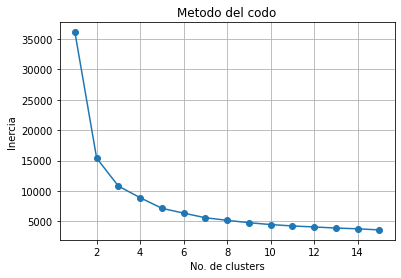

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.cluster import KMeans

sse = []

clusters = list(range(1, 16))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(st_agg_dtNBA)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo")
plt.xlabel("No. de clusters")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

random_state = 20

kmeans = KMeans(n_clusters=3, n_init=20, max_iter=300, random_state=random_state)
kmeans.fit(st_agg_dtNBA) # fit retorna a self
y_pred = kmeans.predict(st_agg_dtNBA)
y_pred

In [ ]:
random_state = 20

kmeans = KMeans(n_clusters=2, n_init=20, max_iter=300, random_state=random_state)
kmeans.fit(st_agg_dtNBA) # fit retorna a self
y_pred = kmeans.predict(st_agg_dtNBA)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)